# Problem
- Gemma2 cannot translate `hanja(Korean Chinese)` into `modern Korean` properly

## Check the problem
- The `input` data was extracted from `태조실록1권 태조1년 7월 17일 병신 2번째기사(Korean Dynasty First King's records)`. The answer should be `answer`, but the result(model's best output among 5 different tries) is `output`, showing the meanings of the answer and the output are very different(actually wrong).
- `input`: `'上在潛邸, 夢有神人執金尺自天而降, 授之曰: "慶侍中 復興, 淸矣而已老; 崔都統 瑩, 直矣而少戇。 持此正國, 非公而誰!"'`
- `answer`: `'임금이 잠저(潛邸)에 있을 때, 꿈에 신인(神人)이 금자[金尺]를 가지고 하늘에서 내려와 주면서 말하기를, "시중(侍中) 경복흥(慶復興)은 청렴하기는 하나 이미 늙었으며, 도통(都統) 최영(崔瑩)은 강직하기는 하나 조금 고지식하니, 이것을 가지고 나라를 바룰 사람은 공(公)이 아니고 누구이겠는가?" 하였다.'`
- `output`(model's output): `상을 잠들고, 꿈에 신인이 돈을 잡아 천장에서 내려왔다. 그에게 말했다: "정실 중, 복흥을 이루고, 깨끗해졌다. 崔都통 瑩, 곧 똑똑해졌지만, 멍청해졌다. 이 정권을 지키는 것은 공적인 일이 아니야!"`

## ChatGPT(4o)'s Output
- prompt: `한국의 한자로 된 고어 문서를 현대 한국어로 번역해줘. 영어나 중국어를 쓰지 말고 한글로 답변해줘. '上在潛邸, 夢有神人執金尺自天而降, 授之曰: "慶侍中 復興, 淸矣而已老; 崔都統 瑩, 直矣而少戇。 持此正國, 非公而誰!"'`
- output:
다음은 고어로 된 문장을 현대 한국어로 번역한 내용입니다.

`"임금께서 잠시 머물던 곳에서 꿈을 꾸었는데, 신령스러운 사람이 금자(금으로 만든 자)를 들고 하늘에서 내려와 말하기를, '경 시중(慶侍中)은 나라를 다시 일으킬 만하나, 맑기는 하지만 나이가 많다. 최 도통(崔都統)은 정직하지만 조금 우둔하다. 이 자로 나라를 바로잡을 사람이 공(公)이 아니면 누가 있겠는가!'라고 하였다."`

배경 설명:

"상재잠저(上在潛邸)": 임금이 왕위에 오르기 전 거처하던 곳.
"시중(侍中)": 고려나 조선시대의 고위 관직.
"도통(都統)": 군사 직위나 관직.
"공(公)": 존칭으로, 높은 관직이나 인물을 지칭.
문맥에서 신령이 왕에게 꿈에서 금자를 주며 나라를 바로잡을 임무를 맡기는 장면으로 보입니다.

In [2]:
# Before run this script, you should create a token in Kaggle and save it in ~/.kaggle/kaggle.json
# import kagglehub

# # Download latest version
# path = kagglehub.model_download("keras/gemma2/keras/gemma2_instruct_2b_en")

# print("Path to model files:", path)
# # ~/.cache/kagglehub/models/keras/gemma2/keras/gemma2_instruct_2b_en/2

In [3]:
import os 

# # Set the backbend before importing Keras
# os.environ["KERAS_BACKEND"] = "jax"
# # Avoid memory fragmentation on JAX backend.
# os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.00"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [6]:
import keras
import keras_nlp
import time

# Change this to the path where you downloaded the model
model_id = "~/.cache/kagglehub/models/keras/gemma2/keras/gemma2_instruct_2b_en/2"

gemma = keras_nlp.models.GemmaCausalLM.from_preset(model_id)
gemma.summary()

normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                              │                      Vocab size: 256,000 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2304)        │   2,614,341,888 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     589,824,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,614,341,888 (9.74 GB)

 Trainable params: 2,614,341,888 (9.74 GB)

 Non-trainable params: 0 (0.00 B)

In [29]:
tick_start = 0
token_limit = 512 

def tick():
    global tick_start
    tick_start = time.time()


def tock():
    print(f"TOTAL TIME ELAPSED: {time.time() - tick_start:.2f}s")


def text_gen(prompt):
    tick()
    input = f"<start_of_turn>user\n{prompt}<end_of_turn>\n<start_of_turn>model\n"
    output = gemma.generate(input, max_length=token_limit)
    print("\nGemma output:")
    print(output)
    tock()


def text_gen_with_few_shot(prompt, few_shot):
    few_shot_str = ""
    for x, y in few_shot:
        few_shot_str += f"<start_of_turn>user\n{x}<end_of_turn>\n<start_of_turn>model\n{y}<end_of_turn>\n"
        
    tick()
    input = f"{few_shot_str}<start_of_turn>user\n{prompt}<end_of_turn>\n<start_of_turn>model\n"
    output = gemma.generate(input, max_length=token_limit)
    # Get the last response from the model
    last_index = output.rfind("<start_of_turn>user")
    output = output[last_index:]
    print("\nGemma output:")
    print(output)
    tock()

In [31]:
test_hanja = '上在潛邸, 夢有神人執金尺自天而降, 授之曰: "慶侍中 復興, 淸矣而已老; 崔都統 瑩, 直矣而少戇。 持此正國, 非公而誰!"'
test_answer = '임금이 잠저(潛邸)에 있을 때, 꿈에 신인(神人)이 금자[金尺]를 가지고 하늘에서 내려와 주면서 말하기를, "시중(侍中) 경복흥(慶復興)은 청렴하기는 하나 이미 늙었으며, 도통(都統) 최영(崔瑩)은 강직하기는 하나 조금 고지식하니, 이것을 가지고 나라를 바룰 사람은 공(公)이 아니고 누구이겠는가?" 하였다.'
test_answer

'임금이 잠저(潛邸)에 있을 때, 꿈에 신인(神人)이 금자[金尺]를 가지고 하늘에서 내려와 주면서 말하기를, "시중(侍中) 경복흥(慶復興)은 청렴하기는 하나 이미 늙었으며, 도통(都統) 최영(崔瑩)은 강직하기는 하나 조금 고지식하니, 이것을 가지고 나라를 바룰 사람은 공(公)이 아니고 누구이겠는가?" 하였다.'

In [9]:
text_gen(test_hanja)

I0000 00:00:1735914249.629648   11284 service.cc:148] XLA service 0x7efca94656f0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735914249.630081   11284 service.cc:156]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1735914249.653450   11284 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Gemma output:
<start_of_turn>user
上在潛邸, 夢有神人執金尺自天而降, 授之曰: "慶侍中 復興, 淸矣而已老; 崔都統 瑩, 直矣而少戇。 持此正國, 非公而誰!"<end_of_turn>
<start_of_turn>model
This is a classic Chinese poem, likely from the Tang Dynasty, known for its poetic imagery and philosophical depth. Let's break down its meaning:

**The Context:**

* **"上在潛邸"**:  This means the speaker is in a secluded, hidden place, possibly a mountaintop or a cave. This setting suggests a contemplative and introspective mood.
* **"夢有神人執金尺自天而降"**:  This is a dream. A divine person, possibly a god or a wise sage, descends from the sky with a golden ruler. 
* **"授之曰: '慶侍中 復興, 淸矣而已老; 崔都統 瑩, 直矣而少戇。 持此正國, 非公而誰!'"**:  The divine person gives the speaker a golden ruler. The message is delivered in a series of pronouncements:

    * **"慶侍中 復興, 淸矣而已老"**:  "The Prime Minister, who is now in decline, can be revived. It is only a matter of time." This suggests a call for revitalization and renewal.
    * **"崔都統 瑩, 直矣而少戇"**: "The Prime Minister, who is now in dec

In [10]:
text_gen(f'한국의 한자로 된 고어 문서를 현대 한국어로 번역해줘. {test_hanja}')


Gemma output:
<start_of_turn>user
한국의 한자로 된 고어 문서를 현대 한국어로 번역해줘. 上在潛邸, 夢有神人執金尺自天而降, 授之曰: "慶侍中 復興, 淸矣而已老; 崔都統 瑩, 直矣而少戇。 持此正國, 非公而誰!"<end_of_turn>
<start_of_turn>model
## Translation of the Korean Hanja Text:

**"Above the subterranean dwelling, there was a dream of a divine man holding a golden ruler that descended from heaven. He said, 'This is the way to restore the country, to revive it. It is only old; the Prime Minister of the Imperial Court, Choi, is wise and intelligent. Holding this, one can restore the country, not for the sake of the public, but for whom?'"**


**Explanation:**

This text is a fragment of a historical document, likely a conversation between a powerful figure and a subordinate. 

* **"Above the subterranean dwelling"**: This likely refers to a hidden or secret location, possibly a palace or a place of power.
* **"there was a dream of a divine man holding a golden ruler that descended from heaven"**: This suggests a vision or prophecy, possibly about a future l

In [12]:
text_gen(f'한국의 한자로 된 고어 문서를 현대 한국어로 번역해줘. 영어나 중국어를 쓰지 말고 한글로 답변해줘. {test_hanja}')


Gemma output:
<start_of_turn>user
한국의 한자로 된 고어 문서를 현대 한국어로 번역해줘. 영어나 중국어를 쓰지 말고 한글로 답변해줘. 上在潛邸, 夢有神人執金尺自天而降, 授之曰: "慶侍中 復興, 淸矣而已老; 崔都統 瑩, 直矣而少戇。 持此正國, 非公而誰!"<end_of_turn>
<start_of_turn>model
**상을 잠들고, 꿈에 신인이 돈을 잡아 천장에서 내려왔다. 그에게 말했다: "정실 중, 복흥을 이루고, 깨끗해졌다. 崔都통 瑩, 곧 똑똑해졌지만, 멍청해졌다. 이 정권을 지키는 것은 공적인 일이 아니야!"** 
<end_of_turn>
TOTAL TIME ELAPSED: 46.15s


## Few-shot prompting

In [30]:
few_shot = [
    ('庚午朔/隕霜。', '경오삭(庚午朔)에 서리가 내리었다.'),
    ('壬申/上坐東涼廳, 召閱擲石軍, 命中樞趙琦領之。', '임금이 동량청(東涼廳)에 앉아 척석군(擲石軍)을 불러 사열하고, 중추(中樞) 조기(趙琦)에게 명하여 이들을 거느리게 하였다.'),
    ('都評議使司具戶曹給田司田制, 狀申, 上允之。', '도평의사사에서 호조 급전사(戶曹給田司)의 전제(田制)를 갖추어 장계(狀啓)로 아뢰니, 임금이 그대로 윤허하였다.')
]

text_gen_with_few_shot(test_hanja, few_shot)


Gemma output:
<start_of_turn>user
上在潛邸, 夢有神人執金尺自天而降, 授之曰: "慶侍中 復興, 淸矣而已老; 崔都統 瑩, 直矣而少戇。 持此正國, 非公而誰!"<end_of_turn>
<start_of_turn>model
임금은 잠자리에 있었는데, 꿈에서 신성한 인물이 금 척을 땅에서 떨어뜨렸고, 그에게 말했다: "정신을 갖추고, 옛날의 힘을 되찾아, 깨끗하게 만들어야 한다. 옛날의 힘을 되찾아, 깨끗하게 만들어야 한다. 옛날의 힘을 되찾아, 깨끗하게 만들어야 한다. 옛날의 힘을 되찾아, 깨끗하게 만들어야 한다. 옛날의 힘을 되찾아, 깨끗하게 만들어야 한다. 옛날의 힘을 되찾아, 깨끗하게 만들어야 한다. 옛날의 힘을 되찾아, 깨끗하게 만들어야 한다. 옛날의 힘을 되찾아, 깨끗하게 만들어야 한다. 옛날의 힘을 되찾아, 깨끗하게 만들어야 한다. 옛날의 힘을 되찾아, 
TOTAL TIME ELAPSED: 134.56s


# Dataset
## Load data

In [13]:
import json
import glob 

def load_jsonl(filepath):
    with open(filepath, 'r') as f:
        for line in f:
            yield json.loads(line)

# It's not possible to train gemma2 using the whole data due to time-limitation
# See my github project to train the model in a local environment
# filepaths = glob.glob('/kaggle/input/joseon-dynasty-silok/*.jsonl')
train_filepaths = ['~/data/hdd01/datasets/kaggle/nlp/google-ugc/silok/kaa.jsonl']
test_filepaths = ['~/data/hdd01/datasets/kaggle/nlp/google-ugc/silok/kba.jsonl']

def get_data(filepaths):
    data = []
    for filepath in filepaths:
        data.extend(list(load_jsonl(filepath)))
    return data 

train_data = get_data(train_filepaths)
test_data = get_data(test_filepaths)
valid_data = test_data[-(len(test_data)//3):]
test_data = test_data[:-len(valid_data)]

print(f"total number of train data: {len(train_data)}\ntotal number of valid data: {len(valid_data)}\ntotal number of test data: {len(test_data)}")

total number of train data: 2251
total number of valid data: 208
total number of test data: 416


In [14]:
train_data[1]

{'title': '자료열람 태조실록 태조 1년 태조 1년 7월 태조 1년 7월 17일',
 'hangul': '임금이 잠저(潛邸)에 있을 때, 꿈에 신인(神人)이 금자[金尺]를 가지고 하늘에서 내려와 주면서 말하기를,"시중(侍中) 경복흥(慶復興)은 청렴하기는 하나 이미 늙었으며, 도통(都統) 최영(崔瑩)은 강직하기는 하나 조금 고지식하니, 이것을 가지고 나라를 바룰 사람은 공(公)이 아니고 누구이겠는가?"하였다. 그 뒤에 어떤 사람이 문밖에 이르러 이상한 글을 바치면서 말하기를,"이것을 지리산(智異山) 바위 속에서 얻었습니다."하는데, 그 글에,"목자(木子)005) 가 돼지를 타고 내려와서 다시 삼한(三韓)의 강토를 바로잡을 것이다."하고, 또,"비의(非衣)006) ·주초(走肖)007) ·삼전 삼읍(三奠三邑)008) "등의 말이 있었다. 사람을 시켜 맞이해 들어오게 하니 이미 가버렸으므로, 이를 찾아도 찾아내지 못하였다. 고려의 서운관(書雲觀)에 간직한 비기(秘記)에 ‘건목득자(建木得子)’의 설(說)이 있고, 또 ‘왕씨(王氏)가 멸망하고 이씨(李氏)가 일어난다.’는 말이 있는데, 고려의 말년에 이르기까지 숨겨지고 발포(發布)되지 않았더니, 이때에 이르러 세상에 나타나게 되었다. 또 조명(早明)이란 말이 있는데 사람들이 그 뜻을 깨닫지 못했더니, 뒤에 국호(國號)를 조선이라 한 뒤에야 조명(早明)이 곧 조선(朝鮮)을 이른 것인 줄을 알게 되었다. 의주(宜州)에 큰 나무가 있는데 말라 썩은 지 여러 해가 되었으나, 개국(開國)하기 전 1년에 다시 가지가 나고 무성하니, 그때 사람들이 개국의 징조라고 말하였다. 또 태조가 잠저(潛邸)에 있을 때 일찍이 시중(侍中) 경복흥(慶復興)의 사제(私第)에 갔더니, 복흥(復興)이 영접해 들이고 그 아내로 하여금 나와 보게 하면서 존경하는 뜻이 매우 지극했으며, 또 그 자손을 부탁하면서 말하기를,"나의 어리석은 자손을 공(公)께서 장차 비호(庇護)해야 될 것이오니, 공은 행여 잊지 마시기를 바랍니다."하며, 매양 태조를 대접하

In [15]:
train_data[2]

{'title': '자료열람 태조실록 태조 1년 태조 1년 7월 태조 1년 7월 18일',
 'hangul': '비가 내리었다. 이보다 앞서 오랫동안 가물었는데, 임금이 왕위에 오르자 억수같이 비가 내리니, 백성의 마음이 크게 기뻐하였다.',
 'hanja': '○丁酉/雨。 前此久旱, 及上卽位, 霈然下雨, 人心大悅。',
 'url': 'https://sillok.history.go.kr/id/kaa_10107018_001'}

## Tokeninzation to train model

In [16]:
# https://www.kaggle.com/code/bebechien/translator-of-old-korean-literature
token_limit = 512 # max: 8192, 1024: OOM
tokenizer = keras_nlp.models.GemmaTokenizer.from_preset(model_id)

def get_data_to_train_gemma2(data, token_limit=token_limit):
    samples = []
    for x in data:
        item = f"<start_of_turn>user\n{x['hanja']}<end_of_turn>\n<start_of_turn>model\n{x['hangul']}<end_of_turn>"
        length = len(tokenizer(item))
        # skip data if the token length is longer than our limit
        if length < token_limit:
            samples.append(item)
    return samples 

train_samples = get_data_to_train_gemma2(train_data)
valid_samples = [(d['hanja'], d['hangul']) for d in valid_data]
test_samples = [(d['hanja'], d['hangul']) for d in test_data]

print(f"number of train samples: {len(train_samples)}\nnumber of valid samples: {len(valid_samples)}\nnumber of test samples: {len(test_samples)}")

number of train samples: 1979
number of valid samples: 208
number of test samples: 416


In [17]:
train_samples[0]

'<start_of_turn>user\n○丁酉/雨。 前此久旱, 及上卽位, 霈然下雨, 人心大悅。<end_of_turn>\n<start_of_turn>model\n비가 내리었다. 이보다 앞서 오랫동안 가물었는데, 임금이 왕위에 오르자 억수같이 비가 내리니, 백성의 마음이 크게 기뻐하였다.<end_of_turn>'

# Model
## Train

In [18]:
# Training Configurations
debug = True
lora_name = "hanja2hangul"
lora_rank = 4
lr_value = 1e-4
train_epoch = 3 if debug else 10

In [22]:
import numpy as np 
val_x, val_y = zip(*valid_samples)
val_x = np.array(val_x)
val_y = np.array(val_y)

test_x, test_y = zip(*test_samples)
test_x = np.array(test_x)
test_y = np.array(test_y)

if debug:
    train_samples = train_samples[:10]
    val_x = val_x[:10]
    val_y = val_y[:10]
    test_x = test_x[:10]
    test_y = test_y[:10]

In [20]:
# # Enable LoRA for the model and set the LoRA rank (4, 8 or 16).
gemma.backbone.enable_lora(rank=lora_rank)
gemma.summary()

# Limit the input sequence length (to control memory usage).
gemma.preprocessor.sequence_length = token_limit
# Use AdamW (a common optimizer for transformer models).
optimizer = keras.optimizers.AdamW(
    learning_rate=lr_value,
    weight_decay=0.01,
)
# Exclude layernorm and bias terms from decay.
optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])

gemma.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                              │                      Vocab size: 256,000 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2304)        │   2,617,270,528 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     589,824,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,617,270,528 (9.75 GB)

 Trainable params: 2,928,640 (11.17 MB)

 Non-trainable params: 2,614,341,888 (9.74 GB)

In [21]:
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        model_name = f"~/data/hdd01/datasets/kaggle/nlp/google-ugc/weights/{lora_name}_{lora_rank}_epoch{epoch+1}.lora.h5"
        gemma.backbone.save_lora_weights(model_name)

In [23]:
history = gemma.fit(train_samples, validation_data=(val_x, val_y), epochs=train_epoch, batch_size=1, callbacks=[CustomCallback()])



Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 148s 13s/step - loss: 1.0353 - sparse_categorical_accuracy: 0.3636 - val_loss: 1.2493 - val_sparse_categorical_accuracy: 0.2117
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 121s 12s/step - loss: 1.0105 - sparse_categorical_accuracy: 0.3689 - val_loss: 1.2297 - val_sparse_categorical_accuracy: 0.2117


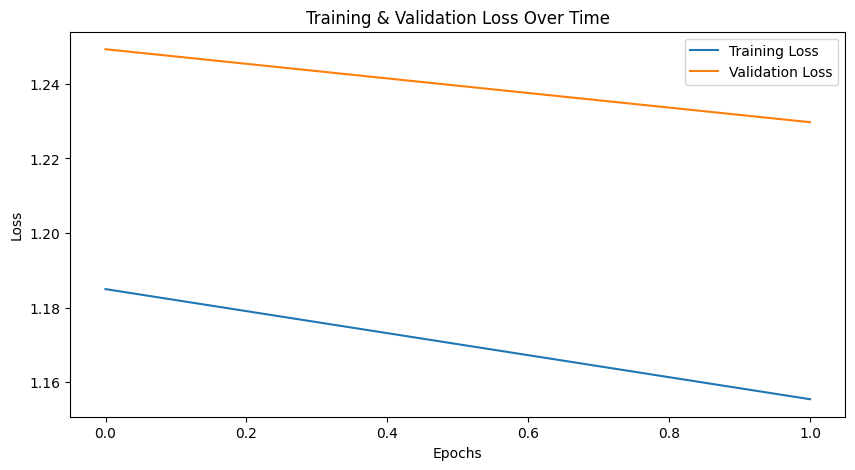

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Over Time')
plt.legend()
plt.show()

In [25]:
text_gen('詣眞殿, 行茶禮。')  # https://sillok.history.go.kr/id/kza_10201001_001
# 진전(眞殿)에 가서 다례(茶禮)를 지냈다. (고종2년 1월)


Gemma output:
<start_of_turn>user
詣眞殿, 行茶禮。<end_of_turn>
<start_of_turn>model
This is a beautiful and poetic phrase in Chinese! 

**Translation:**

* **詣眞殿:**  To pay respects to the main hall.
* **行茶禮:** To perform the tea ceremony.

**Meaning:**

The phrase literally translates to "To go to the main hall and perform the tea ceremony."  However, it carries a deeper meaning. It's a way of expressing respect and hospitality, often used in formal settings like a temple or a tea ceremony. 

**Context:**

This phrase is often used in situations where someone is being invited to a special event or ceremony. It signifies a sense of honor and respect for the host and the occasion.


Let me know if you'd like to know more about the tea ceremony or Chinese culture! 
<end_of_turn>
TOTAL TIME ELAPSED: 100.38s


In [ ]:
text_gen('凡我在廷, 咸須知悉, 諧底大道, 同此太平。 是予之望也。')  # https://sillok.history.go.kr/id/kza_10201001_003, end of the text 
# 우리 조정에 있는 모든 신료들은 다 잘 알아서 모두 대도(大道)에 이르고 함께 이 태평을 누리도록 하라. 이것이 나의 바람이다. (고종2년 1월)

In [ ]:
text_gen('詣懿陵, 親祭, 仍詣貞陵, 親祭。')  # https://sillok.history.go.kr/id/kza_10608010_001
# 의릉(懿陵)에 나아가 친히 제사를 지냈다. 이어 정릉(貞陵)에 나아가 친히 제사를 지냈다.